# 1. Define Objectives & Access to Dataset


My goals for this study are to:
1. Find the best-selling items on the e-commerce provider's platform
2. To determine the most popular payment methods used by consumers to purchase items from the business
3. Analyzing the best and worst-rated items based on customer feedback.
4. Correlation of character traits
5. The breakdown of the payment value per payment method
6. Score Distribution for Reviews


I will require datasets on the sold goods (olist_products_dataset and product_category_name_translation), the methods of payment (olist_order_payments_dataset), and the product reviews (olist_order_reviews_dataset) in order to achieve these goals. When integrating datasets, I will require an item table with the fields order_id and product_id because certain datasets do not directly connect to one another.

In [1]:
# Library for import database data format
import sqlite3

# Library cleaning and preprocessing data
import pandas as pd
import numpy as np
import datetime as dt

# Library for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Library to ignore future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# connect to your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# creating connection
conn = sqlite3.connect("/content/drive/MyDrive/dataset/olist.db")

# See the table list.
df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
df

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


In [4]:
# customer dataset
customer = pd.read_sql_query(
    """
    SELECT *
    FROM olist_order_customer_dataset;
    """, conn)

# order dataset
order = pd.read_sql_query(
    """
    SELECT *
    FROM olist_order_dataset;
    """, conn)

# review dataset
review = pd.read_sql_query(
    """
    SELECT *
    FROM olist_order_reviews_dataset;
    """, conn)

# payment dataset
payment = pd.read_sql_query(
    """
    SELECT *
    FROM olist_order_payments_dataset;
    """, conn)

# order items dataset
item = pd.read_sql_query(
    """
    SELECT *
    FROM olist_order_items_dataset;
    """, conn)

# category name translation dataset
category = pd.read_sql_query(
    """
    SELECT *
    FROM product_category_name_translation;
    """, conn)

# product dataset
product = pd.read_sql_query(
    """
    SELECT *
    FROM olist_products_dataset;
    """, conn)

# seller dataset
seller = pd.read_sql_query(
    """
    SELECT *
    FROM olist_sellers_dataset;
    """, conn)

# geolocation dataset
geolocation = pd.read_sql_query(
    """
    SELECT *
    FROM olist_geolocation_dataset;
    """, conn)

In [5]:
customer.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
order.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
review.head()

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
payment.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
item.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
category.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [11]:
product.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
seller.head()

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
geolocation.head()

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP


# 2. Data Wrangling

The steps are as follows:
1. By order_id, combine the payment and review tables;
2. Store the outcome in the join table.
3. To combine the join table and the item table using the order_id, then save the outcome in the join table.
4. By using order_id, combine the join table with the order table, and keep the united dataset's name for the result storage.
5. Merge the join table with the product table using the product_id, saving the outcome in the join table.
6. Merge the join table with the category table.


In [14]:
# combine payment table and review table, stored in join table
join_table = payment.merge(review, on="order_id")

# combine join table and order item table, stored in join table
join_table = join_table.merge(item, on="order_id")

# combine join table and order table, stored in join table
join_table = join_table.merge(order, on="order_id")

# combine join table and product table, stored in join table
join_table = join_table.merge(product, on="product_id")

# combine join table and category table, stored in join table
join_table = join_table.merge(category, on="product_category_name")

# check the dimension (ncol & nrow)
join_table.shape

(115609, 39)

In [15]:
# top five-rows of the join dataset
join_table.head()

,index_x,order_id,payment_sequential,payment_type,payment_installments,payment_value,index_y,review_id,review_score,review_comment_title,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y,product_category_name_english
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,19666,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,...,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,40,home_construction
1,45476,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,57328,ec9d84039245b981ebdbf7d16c723b6e,4,None,...,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,40,home_construction
2,177,b545ba7b0bd67a3128185c7214704319,1,credit_card,8,340.08,98120,5f65ad4b5147b940da2da6802f18bbf7,4,None,...,casa_construcao,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,40,home_construction
3,409,6a26bd1a037993f1205073dbeda67db4,1,credit_card,2,67.12,61977,fad89f16742c04dcdfec38fd6c115561,4,None,...,casa_construcao,57.0,565.0,4.0,800.0,38.0,38.0,22.0,40,home_construction
4,3610,1d84d00f6d2334d63f35ba528cd0d99d,1,boleto,1,63.74,40098,20e6537d2c1fb427d85b2d17a650a466,5,None,...,casa_construcao,57.0,565.0,4.0,800.0,38.0,38.0,22.0,40,home_construction


In [16]:
join_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index_x                        115609 non-null  int64  
 1   order_id                       115609 non-null  object 
 2   payment_sequential             115609 non-null  int64  
 3   payment_type                   115609 non-null  object 
 4   payment_installments           115609 non-null  int64  
 5   payment_value                  115609 non-null  float64
 6   index_y                        115609 non-null  int64  
 7   review_id                      115609 non-null  object 
 8   review_score                   115609 non-null  int64  
 9   review_comment_title           13801 non-null   object 
 10  review_comment_message         48906 non-null   object 
 11  review_creation_date           115609 non-null  object 
 12  review_answer_timestamp       

In [17]:
# drop product_category_name
join_table.drop(columns=["product_category_name"], inplace=True, axis=1)

# recheck the result
join_table.head()

,index_x,order_id,payment_sequential,payment_type,payment_installments,payment_value,index_y,review_id,review_score,review_comment_title,...,index_x,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y,product_category_name_english
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,19666,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,...,4626,57.0,921.0,8.0,800.0,17.0,27.0,17.0,40,home_construction
1,45476,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,57328,ec9d84039245b981ebdbf7d16c723b6e,4,None,...,4626,57.0,921.0,8.0,800.0,17.0,27.0,17.0,40,home_construction
2,177,b545ba7b0bd67a3128185c7214704319,1,credit_card,8,340.08,98120,5f65ad4b5147b940da2da6802f18bbf7,4,None,...,26186,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,40,home_construction
3,409,6a26bd1a037993f1205073dbeda67db4,1,credit_card,2,67.12,61977,fad89f16742c04dcdfec38fd6c115561,4,None,...,3510,57.0,565.0,4.0,800.0,38.0,38.0,22.0,40,home_construction
4,3610,1d84d00f6d2334d63f35ba528cd0d99d,1,boleto,1,63.74,40098,20e6537d2c1fb427d85b2d17a650a466,5,None,...,3510,57.0,565.0,4.0,800.0,38.0,38.0,22.0,40,home_construction


The join table has 38 columns and 5 rows once the product_category_name is removed. The columns consist of, in addition to the data index on the left,

1. order_id: a special order identifier made up of a mix of digits and lowercase letters
2. payment_type: the type of payment, such as credit or debit cards, that is preferred.
3. transaction_value: Payment value
4. review_score: a scale of 1 to 5 for customer satisfaction.
5. product_id: a special code for identifying a product that combines lower-case letters and integers
6. product_category_name_english: English-language category name
7. order_purchase_timestamp: timestamp of the purchase


# 3. Data Cleaning

## 3.1 Handling Missing Data

In [18]:
# check missing values
join_table.isna().sum().to_frame().reset_index().rename(columns={"index":"column_name", 0:"value"})

,column_name,value
0,index_x,0
1,order_id,0
2,payment_sequential,0
3,payment_type,0
4,payment_installments,0
5,payment_value,0
6,index_y,0
7,review_id,0
8,review_score,0
9,review_comment_title,101808


## 3.2 Handling Duplicate Data

In [19]:
# check duplicates
join_table[join_table.duplicated(keep=False)]

,index_x,order_id,payment_sequential,payment_type,payment_installments,payment_value,index_y,review_id,review_score,review_comment_title,...,index_x,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y,product_category_name_english


## 3.3 Handling Inconsistent Format

Because categorical data may have different forms, I will examine two columns containing categorical data in this step: product_category_name_english and payment_type.

In [20]:
# check unique values: product_category_name
cat_name_counts = join_table["product_category_name_english"].value_counts().to_frame()
cat_name_counts.reset_index().rename(columns={"index": "product_category_name", "product_category_name_english": "value_counts"})


,product_category_name,value_counts
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,15
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,8


In [21]:
# map inconsistent format
map_inconsistent = {
    "home_appliances_2": "home_appliances",
    "home_comfort_2": "home_comfort"
}

# remove inconsistent formats
join_table["product_category_name_english"] = join_table["product_category_name_english"].replace(map_inconsistent)


# recheck
join_table["product_category_name_english"].unique()

array(['home_construction', 'auto', 'perfumery', 'bed_bath_table',
       'housewares', 'art', 'sports_leisure', 'furniture_living_room',
       'garden_tools', 'electronics', 'signaling_and_security',
       'cool_stuff', 'watches_gifts', 'baby', 'furniture_decor',
       'construction_tools_lights', 'pet_shop', 'health_beauty',
       'office_furniture', 'consoles_games', 'home_appliances',
       'telephony', 'toys', 'stationery', 'books_general_interest',
       'computers_accessories', 'small_appliances',
       'fashion_bags_accessories', 'costruction_tools_garden',
       'musical_instruments', 'christmas_supplies', 'luggage_accessories',
       'construction_tools_construction', 'costruction_tools_tools',
       'market_place', 'food_drink', 'home_confort', 'fixed_telephony',
       'audio', 'air_conditioning', 'fashion_sport',
       'kitchen_dining_laundry_garden_furniture',
       'construction_tools_safety', 'food',
       'industry_commerce_and_business', 'computers', 'dri

In [22]:
# check unique values: product_category_name
payment_type_counts = join_table["payment_type"].value_counts().to_frame()
payment_type_counts.reset_index().rename(index={"index":"payment_type", "payment_type":"value_count"})

,index,payment_type
0,credit_card,85278
1,boleto,22510
2,voucher,6162
3,debit_card,1659


## 3.4 Handling Outliers

Due to the fact that payment_value only has one column of actual numeric data, make sure to verify it for outliers.

In [23]:
# remove warning message
import warnings
warnings.filterwarnings("ignore")
join_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index_x                        115609 non-null  int64  
 1   order_id                       115609 non-null  object 
 2   payment_sequential             115609 non-null  int64  
 3   payment_type                   115609 non-null  object 
 4   payment_installments           115609 non-null  int64  
 5   payment_value                  115609 non-null  float64
 6   index_y                        115609 non-null  int64  
 7   review_id                      115609 non-null  object 
 8   review_score                   115609 non-null  int64  
 9   review_comment_title           13801 non-null   object 
 10  review_comment_message         48906 non-null   object 
 11  review_creation_date           115609 non-null  object 
 12  review_answer_timestamp       

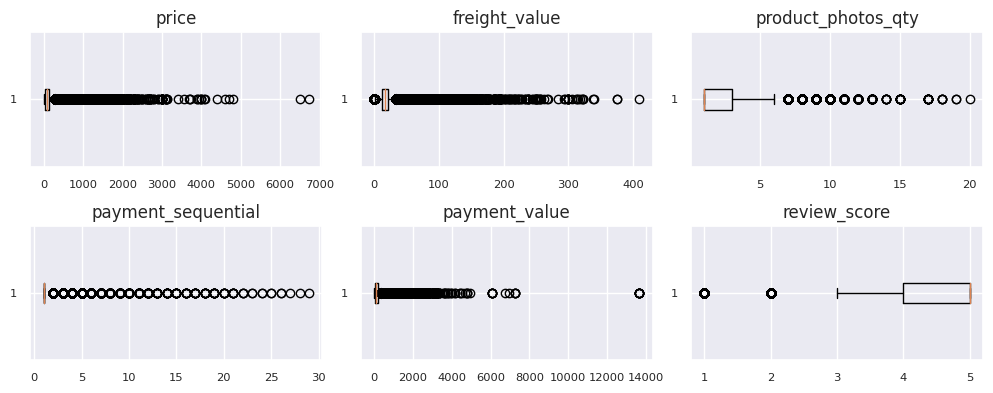

In [37]:
# List of numeric columns
num_col = ['price', 'freight_value', 'product_photos_qty', 'payment_sequential', 'payment_value', 'review_score']

# Create subplots with 3x2 grids and size 10x4
fig, ax = plt.subplots(2, 3, figsize=(10,4))

cnt = 0

# Loop through the grids
for i in range(2):

    if cnt >= 7:
            break

    for j in range(3):

        if cnt >= 7:
            break

        # We use boxplot from pyplot
        ax[i, j].boxplot(join_table[num_col[cnt]], vert=False)
        ax[i, j].set_title(str(num_col[cnt]), fontdict={'fontsize':12})

        # Increment counter
        cnt = cnt+1

# Make sure layout is not overlapping
fig.tight_layout()
# Show the graphs
fig.show()

# 4. Data Visualization

## 4.1 Find the best-selling items on the e-commerce provider's platform

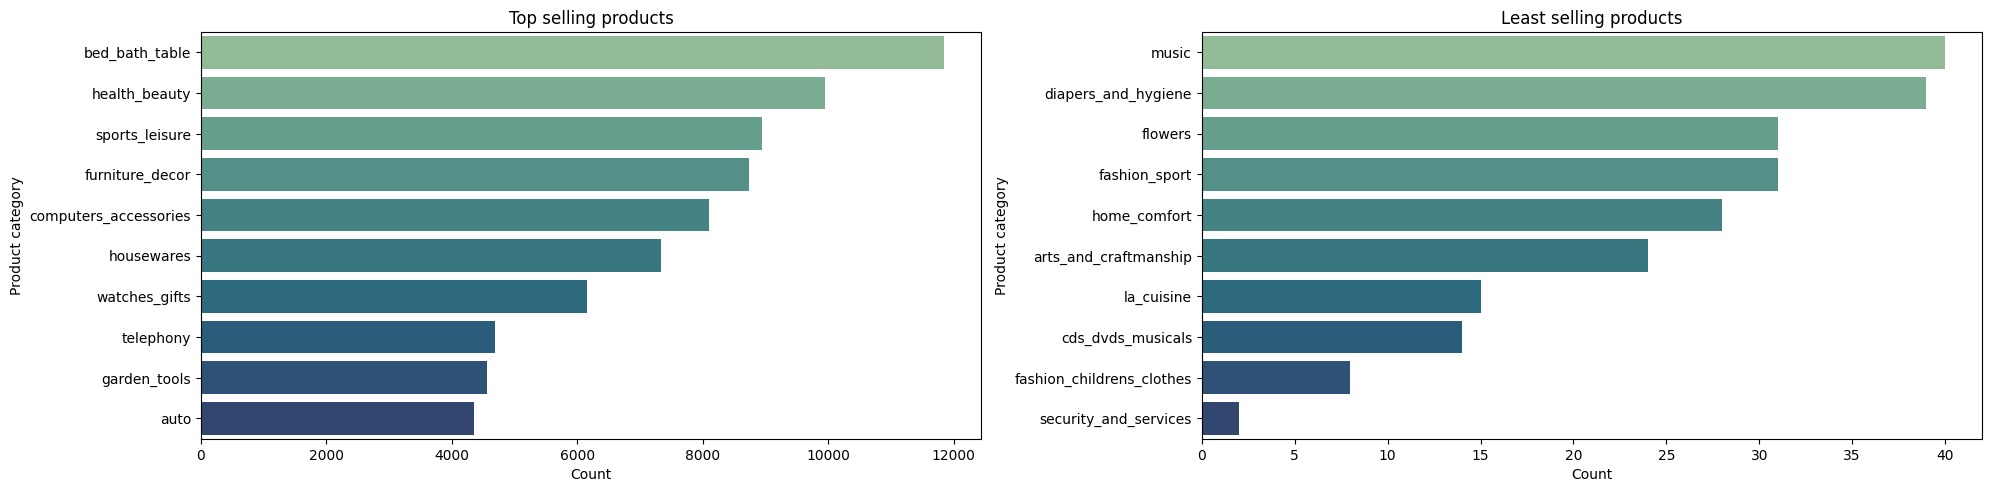

In [25]:
# prepare data
top_selling_products = join_table["product_category_name_english"].value_counts().to_frame()
top_selling_products = top_selling_products.reset_index().rename(columns={"index":"product_category", "product_category_name_english":"count"})
top = top_selling_products.head(10)
last = top_selling_products.tail(10)

# visualize data
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=top, x="count", y="product_category", palette="crest")
plt.title("Top selling products")
plt.xlabel("Count")
plt.ylabel("Product category")

plt.subplot(1, 2, 2)
sns.barplot(data=last, x="count", y="product_category", palette="crest")
plt.title("Least selling products")
plt.xlabel("Count")
plt.ylabel("Product category")

plt.tight_layout(pad=1)

## 4.2 To determine the most popular payment methods used by consumers to purchase items from the business

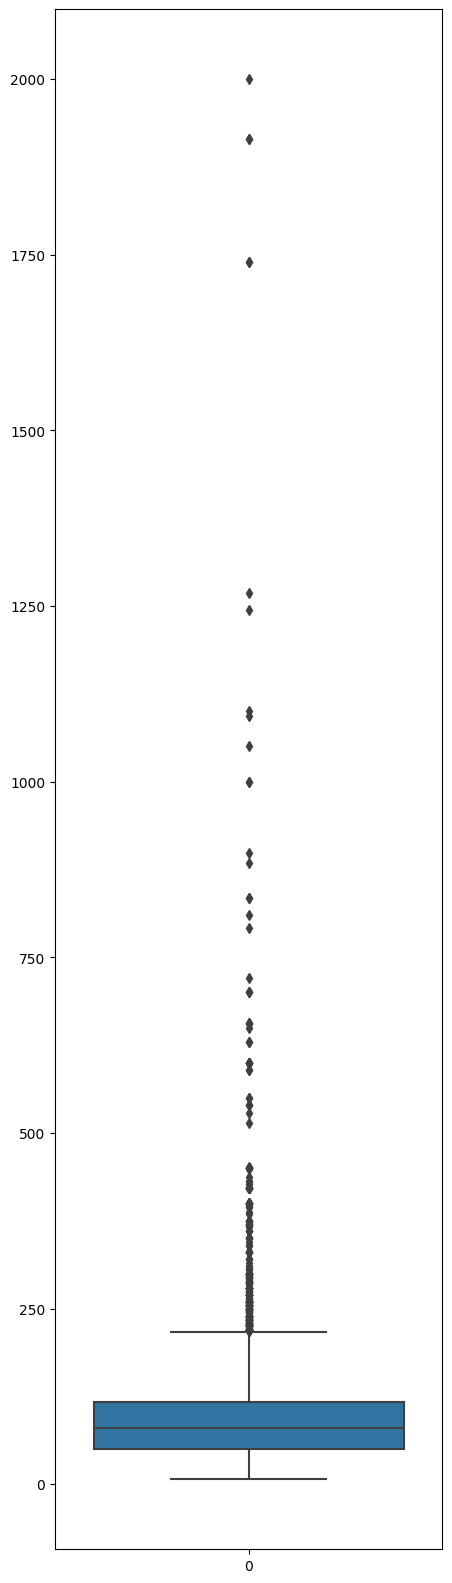

,count,mean,std,min,25%,50%,75%,max
price,10041.0,94.94153,83.583563,6.99,49.9,79.9,116.9,1999.98


In [26]:
# create table consists of order_id, product_id, and price of bed_bath_table products
bed_bath_table = join_table.loc[join_table["product_category_name_english"] == "bed_bath_table"][
                 ["order_id","product_id", "product_category_name_english", "price"]
                 ].drop_duplicates().reset_index().drop("index", axis=1)

# set plot size
fig = plt.figure(figsize =(5,20))

# Create plot
plot = sns.boxplot( bed_bath_table["price"],)

# show plot
plt.show()
bed_bath_table.describe().transpose()

## 4.3 Analyzing the best and worst-rated items based on customer feedback.

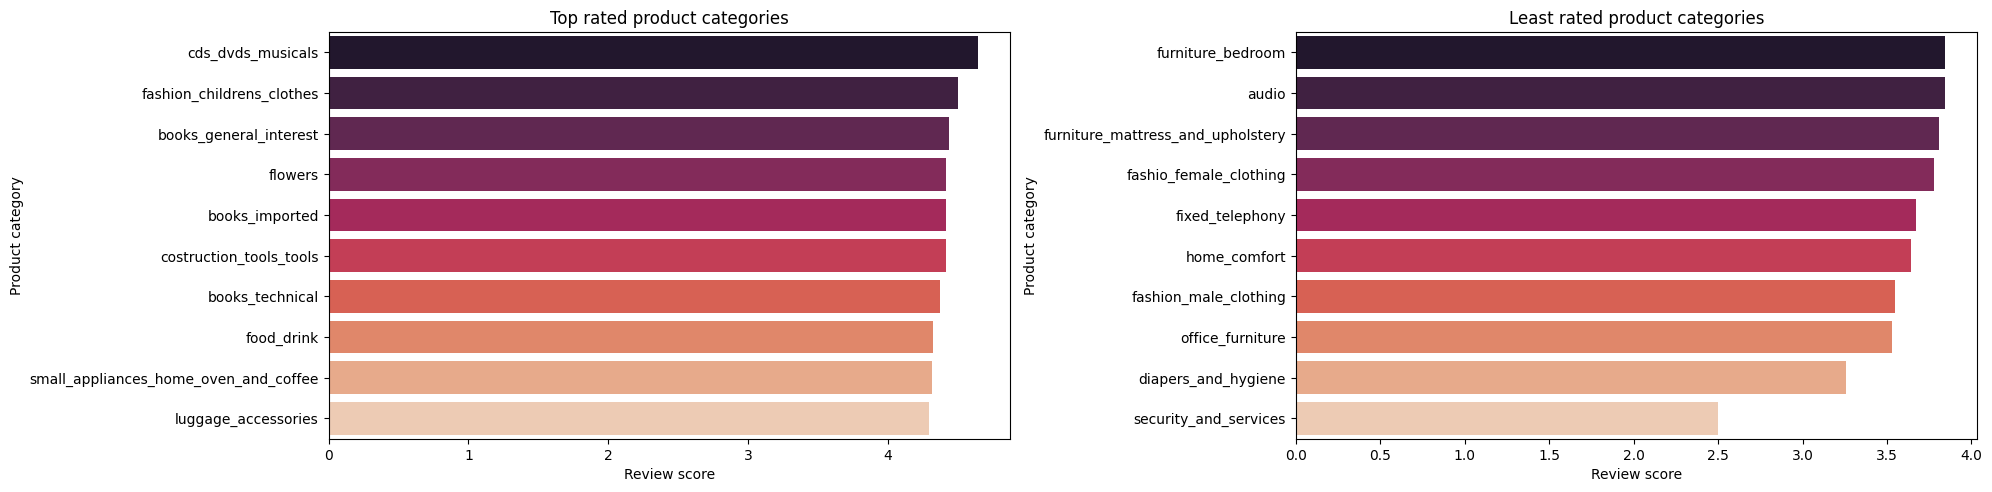

In [27]:
# Prepare the data
product_review = join_table.groupby("product_category_name_english").mean().sort_values("review_score", ascending=False).reset_index()
product_review = product_review.drop(columns = "payment_value")
top_rated = product_review.head(10)
last_rated = product_review.tail(10)

# visualize data
plt.figure(figsize=(20, 5))

# Top rated products
plt.subplot(1, 2, 1)
sns.barplot(data=top_rated, x="review_score", y="product_category_name_english", palette="rocket")
plt.title("Top rated product categories")
plt.xlabel("Review score")
plt.ylabel("Product category")

# Least rated products
plt.subplot(1, 2, 2)
sns.barplot(data=last_rated, x="review_score", y="product_category_name_english", palette="rocket")
plt.title("Least rated product categories")
plt.xlabel("Review score")
plt.ylabel("Product category")

plt.tight_layout(pad=1)

## 4.4 Correlation of character traits

<Axes: >

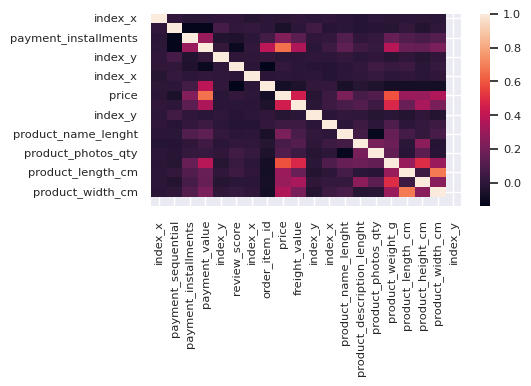

In [28]:
# set plot size
sns.set(rc={'figure.figsize':(5,2.5)})
sns.set(font_scale=0.75)

# calculate correlation value between numerical columns
corr = join_table.loc[join_table["product_category_name_english"] == "bed_bath_table"].drop_duplicates().corr(method="pearson")

# plot the value to heatmap
sns.heatmap(corr)

## 4.5 The breakdown of the payment value per payment method

In [29]:
# prepare the data
payment_type_col = join_table["payment_type"].value_counts(normalize=True)*100
payment_type_col = payment_type_col.to_frame("count")
payment_type_col = payment_type_col.reset_index()
payment_type_col = payment_type_col.rename(columns={"index":"payment_type"})
payment_type_col["count"] = payment_type_col["count"].round(3)
payment_type_col

,payment_type,count
0,credit_card,73.764
1,boleto,19.471
2,voucher,5.330
3,debit_card,1.435


Text(0.5, 1.0, 'Most preferred payment methods')

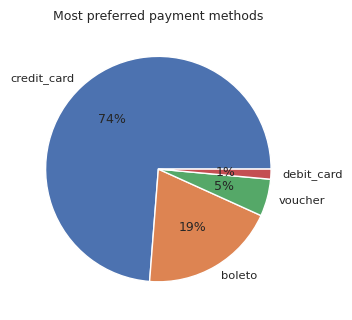

In [30]:
# visualize the data
plt.figure(figsize=(8, 5))

# pie chart
plt.subplot(1, 2, 2)
# explode = [0, 0, 0, 0.2]
plt.pie(data=payment_type_col, x="count",
        labels="payment_type", autopct='%.0f%%')
plt.title("Most preferred payment methods")

## 4.6 Score Distribution for Reviews

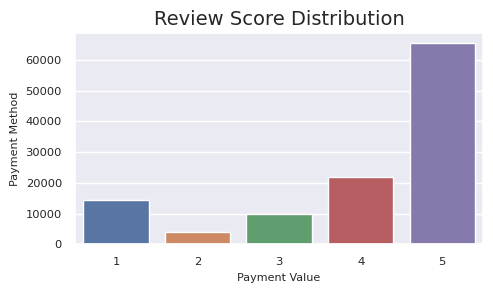

In [31]:
# Create subplots size 5,3
fig, ax = plt.subplots(figsize=(5,3))

# Plot countplot
sns.countplot(data=join_table, x="review_score", ax=ax)
ax.set_title('Review Score Distribution', fontsize=14)
ax.set_xlabel('Payment Value',  fontdict={'fontsize':8})
ax.set_ylabel('Payment Method', fontdict={'fontsize':8})

# Make sure layout is not overlapping
fig.tight_layout()

# Show the graphs
fig.show()

In [32]:
score = [1, 2, 3, 4, 5]

for i in score:
  total = join_table[join_table['review_score']==i]['order_id'].count()
  percent = round(join_table[join_table['review_score']==i]['order_id'].count()/len(join_table)*100, 2)
  print(f'Review score {i}: {total} orders / {percent} %')


Review score 1: 14546 orders / 12.58 %
Review score 2: 4020 orders / 3.48 %
Review score 3: 9718 orders / 8.41 %
Review score 4: 21951 orders / 18.99 %
Review score 5: 65374 orders / 56.55 %
